In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from astropy.io import fits

# Lab 6 -- Transiting exoplanet from TESS

In this lab we will explore the transit method for detecting and characterizing extrasolar planets, using real data from the TESS mission

In [3]:
# load data and print out variable names
f = fits.open('hlsp_qlp_tess_ffi_s0026-0000000157586003_tess_v01_llc.fits')
print(f.info())
print(f[1].data.names)

Filename: hlsp_qlp_tess_ffi_s0026-0000000157586003_tess_v01_llc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      29   ()      
  1  LIGHTCURVE    1 BinTableHDU     65   1148R x 13C   [D, J, E, E, E, J, J, E, E, E, E, E, E]   
None
['TIME', 'CADENCENO', 'SAP_FLUX', 'KSPSAP_FLUX', 'KSPSAP_FLUX_ERR', 'QUALITY', 'ORBITID', 'SAP_X', 'SAP_Y', 'SAP_BKG', 'SAP_BKG_ERR', 'KSPSAP_FLUX_SML', 'KSPSAP_FLUX_LAG']


### 1. Sample TESS transit light curve

The data are stored in the "LIGHTCURVE" portion of the FITS file, with 
variable names listed above. Looking at those, choose one that you think could represent the flux of the star vs time and write its name as flux_variable_name below

In [4]:
flux_variable_name='SAP_FLUX'

### 2. Identify and mark transit signatures

The plot below should make a light curve (flux of the star vs time).

Mark any promising transit signals (periodic drops in brightness) on the light curve plot. Fill in the time in days of the first transit, the period, and the depth of the signal in the variables below and then run the code to mark the transits on the plot.


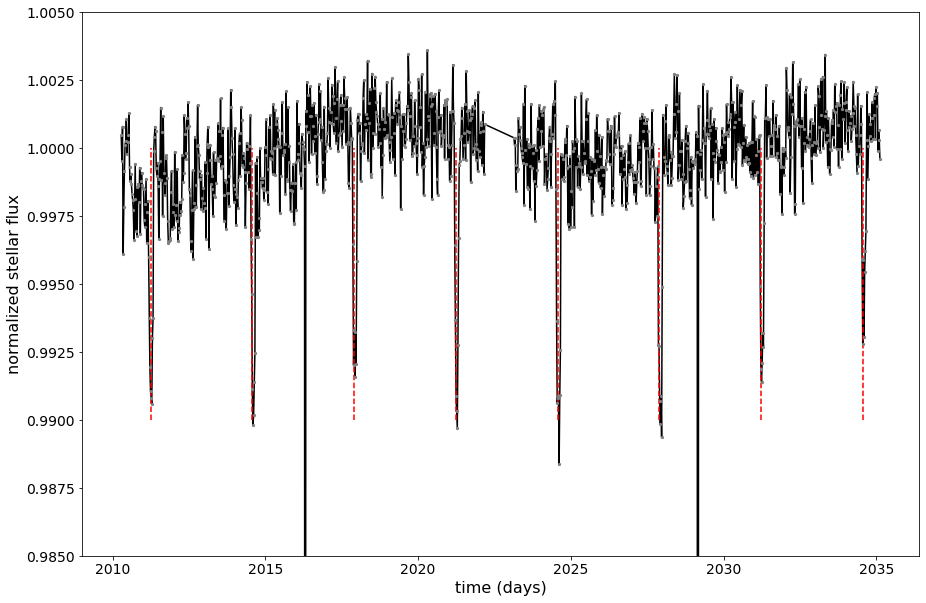

In [5]:
time_variable=f[1].data.field('TIME')
flux_variable=f[1].data.field(flux_variable_name)

fig = plt.figure(figsize=(15,10))
plt.plot(time_variable,flux_variable,color='k')
plt.scatter(time_variable,flux_variable,color='grey',s=5,zorder=3,marker='o')
plt.ylim(0.985,1.005)

plt.xlabel('time (days)',fontsize=16); plt.ylabel('normalized stellar flux',fontsize=16)

ax = plt.gca()
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)

# replace these numbers with your own measurements!
first_transit_time=2011.25
period=3.33
depth=0.01

for i in range(8):
    plt.plot(first_transit_time+i*period+np.zeros(50),depth*np.arange(50)/49.+(1.-depth),linestyle='--',color='red')

### 3. Transit duration and depth

Use the plot below to zoom in on one of the transits and measure its duration.

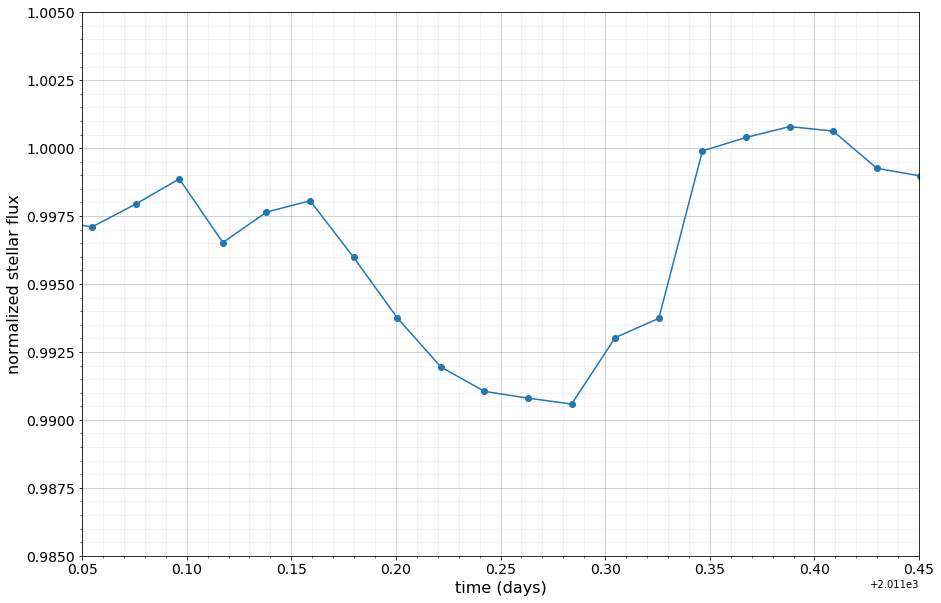

In [6]:
fig = plt.figure(figsize=(15,10))

plt.plot(time_variable,flux_variable,marker="o")
plt.ylim(0.985,1.005)

plt.xlabel('time (days)',fontsize=16); plt.ylabel('normalized stellar flux',fontsize=16)

ax = plt.gca()
ax.yaxis.set_tick_params(labelsize=14);ax.xaxis.set_tick_params(labelsize=14)
plt.grid(b=True,which='minor',alpha=0.2);plt.grid(b=True,which='major',alpha=0.7)
plt.minorticks_on()
plt.xlim(first_transit_time-0.2,first_transit_time+0.2)
ax.xaxis.grid(True,which='minor')


The depth look to be about 0.01 and the duration ~0.18 days!

### 4. The radius of the exoplanet

Write an equation for the radius of the exoplanet. What quantity does it depend on that we haven't measured from the transit light curve?

Find the needed information in the FITS file header below, and solve for the radius of the planet in units of Earth radii.

At the peak of the transit we essentially have two "circles", with the smaller circle in front (the planet) obscuring the larger circle behind (the star) so we can write the fraction of light that drops as:

$$ depth = \frac{\pi R_p^2}{\pi R_*^2} $$

solving for the radius of the planet then give us: 

$$ R_p = R_*\sqrt{depth}$$

In [7]:
print(f[0].header)
Rstar = 1.69483 #solar radii
Rp = Rstar*np.sqrt(0.01)*7e10/6.4e8
Rpaper = 1.55 #jupiter radii
print("\nplanet ~ {:.2f} Earth radii AKA {:.2f} Jupiter radii".format(Rp,Rp/11.2))
print("error from published measurement = {:.2f} %".format((Rp/11.2-Rpaper)/Rpaper*100))

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                    8 / array data type                                NAXIS   =                    0 / number of array dimensions                     EXTEND  =                    T                                                  NEXTEND =                    1 / number of standard extensions                  EXTNAME = 'PRIMARY '           / name of extension                              ORIGIN  = 'MIT/QLP '           / institution responsible for creating this file TELESCOP= 'TESS    '           / telescope                                      INSTRUME= 'TESS Photometer'    / detector type                                  FILTER  = 'TESS    '           / the filter used for the observations           OBJECT  = 'TIC 157586003'      / string version of TICID                        TICID   =            157586003 / unique TESS target identifier                  SECTOR  =                   26 / last ob

### 5. Transit duration and orbital semi-major axis

Use your measured transit duration and period along with Kepler's 3rd law to solve for the total mass of the system and the semi-major axis of the binary orbit. You may assume that the inclination is exactly edge-on ($i = 90^\circ$), although note that we do not know that here!

Using the semi-major axis and Kepler's 3rd law, solve for the total mass of the system.

the transit duration (assuming an inclination of 90 degrees) is $t = \frac{2R_*}{v}$ where $v = \omega a = \frac{2\pi a}{P} $. Putting all that together and solving for a we write:

$$ a = \frac{PR_*}{\pi t}$$

Once we have a we can use Kepler's third law to solve for the total mass of the system (which is really ~just the mass of the star):

$$M_{sys} = \frac{4\pi^2a^3}{P^2G}$$

The differences from the paper here are probably a combination of the fact that we are not exactly edge on (the transit plots also vaguely support this idea) and that the eccentricity is not zero. The mass number reported in the header is very strange and I'm not sure what's going on with it, but it's an order of magnitude higher than the mass reported in the paper so it's definitely wrong.

In [8]:
P = 3.33*24*3600 #days to s
π = np.pi; G = 6.67e-11 #SI

tdur = 0.18*3600*24
a = (P*Rstar*7e8/(π*tdur))/1.5e11
aPaper = 6*Rstar*7e8/1.5e11
print("semi-major axis = {0:.2f} AU".format(a))
print("error from paper = {:.2f} %".format((a-aPaper)/aPaper*100))
Msys = 4*π**2*(a*1.5e11)**3/(P**2*G)/2e30
Mpaper = (1.336+1.2)/2 #solar masses
print("inferred mass from Kepler's 3rd law = {0:.2f} solar masses".format(Msys))
print("error from paper = {:.2f} %".format((Msys-Mpaper)/Mpaper*100))

semi-major axis = 0.05 AU
error from paper = -1.85 %
inferred mass from Kepler's 3rd law = 1.22 solar masses
error from paper = -3.86 %


### 6. Planet mass from the radial velocity

This system also has radial velocity measurements, which show a line of sight velocity amplitude of $0.04$ km s$^{-1}$. Solve for the mass of the planet, assuming it is much smaller than that of its host star.

You might remember the binary mass function from earlier in the course -- we can use that again here! Here we will again assume the incination is 90 degrees (edge on) and that the orbit is circular. This gives the binary mass function f as:

$$ f = \frac{M_p^3}{(M_*+M_p)^2} = \frac{Pv_*^3}{2\pi G} $$

if we again assume that $M_p << M_*$ this reduces to:

$$ \frac{M_p^3}{M_*^2} \approx \frac{Pv_*^3}{2\pi G} $$

so we can solve for the mass of the planet as:

$$ M_p \approx v_* (\frac{PM_*^2}{2\pi G})^{\frac{1}{3}} $$

In [9]:
Mp = 0.04e3*(P*(Msys*2e30)**2/(2*π*G))**(1/3)/1.9e27 #Jupiter masses
print("mass of planet (using given stellar mass) = {:.2f} Jupiter masses".format(Mp))
MpPaper = 0.39 #Jupiter masses
print("error from paper = {:.2f} %".format((Mp-MpPaper)/MpPaper*100))
print("mass in kg to compare to students (WHY???) = {:.2g}".format(Mp*1.9e27))

mass of planet (using given stellar mass) = 0.34 Jupiter masses
error from paper = -13.74 %
mass in kg to compare to students (WHY???) = 6.4e+26


### 7. Daytime temperature

Given the effective temperature of the star above, how would the daytime temperature of the planet compare to that of Earth?

Given the ratio of the fluxes (and neglecting atmospheric/geothermal contributions) the daytime temperature on this exoplanet should be ~7x hotter than the Earth! (pretty close to the number in the paper if you assume the Earth's temperature is ~250 K, which is ~ what you would get if you ignored the atmosphere/geothermal contributions).

In [10]:
T = 5835 #K
σ = 5.67e-8
L = 4*π*(Rstar*7e8)**2*σ*T**4
fE = 3.8e26/(4*π*1.5e11**2) #W/m^2
fP = L/(4*π*(a*1.5e11)**2)
fRatio = fP/fE
TRatio = fRatio**(1/4) #assume it re-radiates incident light as a blackbody, ie no reflectivity 
print("flux/daytime temp is greater on mystery planet by factor of ~ {:.2f} relative to Earth".format(TRatio))

flux/daytime temp is greater on mystery planet by factor of ~ 6.13 relative to Earth


### 8. Characterizing the exoplanet-star system

Using your results above, compare the exoplanet-system measured here with the Earth-Sun system.  Which planet is it most similar to in radius and mass? Is its orbital location similar to where that planet is found in the Solar system?

Properties of solar system planets are listed e.g. at this link
https://nssdc.gsfc.nasa.gov/planetary/factsheet/

This planet has properties most similar to one of the gas/ice giants, yet it orbits its host star tighter in than Mercury does in our own solar system! This is one of the infamously poorly explained (by theory, anyways) "hot Jupiters" that we've found a surprisingly large number of in our (very biased) search for exoplanets.

For comparision, see table 3 of the paper that identified this (WASP-153b) planet! https://arxiv.org/pdf/1710.06321.pdf